In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

#To mute Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Weekly
df_w_2020_23 = pd.read_csv('./data/VolumeDataset_2020_to_2023.csv')

# Monthly
df_m_2020_23 = pd.read_csv('./data/Month_clean_data.csv')

In [3]:
#  Made Date index column 
dates = df_w_2020_23.Year*100+df_w_2020_23.Week
df_w_2020_23['Date'] = pd.to_datetime(dates.astype(str) + '0', format='%Y%W%w')
df_w_2020_23 = df_w_2020_23.set_index('Date')

df_m_2020_23 = df_m_2020_23.set_index('Date')



for df in [df_w_2020_23, df_m_2020_23]:
    display(df.head())

,Year,Week,A1,A2,E1,E2,N1,N2,N3,S1,S2,S3,W1,W2,W3,Cleared Volume,MCV
Date,,,,,,,,,,,,,,,,,
2020-01-12,2020,1,16911.93,33756.53,48253.47,51912.76,34120.12,48682.29,0.0,118862.33,8394.66,604.80,164894.79,70374.62,185102.58,781869.95,788121.16
2020-01-19,2020,2,16678.16,35520.72,68177.88,57986.37,42388.81,75084.86,0.0,148760.74,19815.62,650.20,257190.84,87611.24,304985.01,1114849.33,1129493.91
2020-01-26,2020,3,18848.19,23953.29,74396.13,39749.67,50518.35,90128.99,0.0,147718.97,22392.94,832.80,209441.27,90702.62,245815.56,1014497.72,1014497.72
2020-02-02,2020,4,13864.97,30214.57,66323.83,74711.48,44585.04,156190.36,0.0,162732.93,32756.68,750.60,181776.78,133732.89,159148.69,1056787.47,1056787.45
2020-02-09,2020,5,19588.03,27242.09,47763.37,83659.99,60050.33,154508.37,0.0,161117.18,26246.31,695.61,198066.16,132061.48,202806.64,1113804.41,1116246.21


,Month,A1,A2,E1,E2,N1,N2,N3,S1,S2,S3,W1,W2,W3,Cleared Volume,MCV
Date,,,,,,,,,,,,,,,,
01-01-2020,1,66303.25,123445.11,257151.31,224360.28,171612.32,370086.50,0.0,578074.97,83359.90,2838.40,813303.68,382421.37,895051.84,3968004.47,3988900.24
01-02-2020,2,74862.97,104828.98,208028.44,434917.15,238676.95,476956.27,0.0,534379.41,142714.33,3102.46,568893.78,675279.49,757637.25,4220272.12,4222713.99
01-03-2020,3,37087.81,144506.05,620054.99,474525.58,326302.03,786295.16,0.0,199910.55,51569.67,2823.86,304063.81,447513.10,1247417.93,4642064.05,4657620.35
01-04-2020,4,42797.94,215447.04,386198.01,469504.46,523446.95,760255.22,0.0,54273.49,42244.35,1558.74,72899.64,507490.71,325247.66,3401358.28,3401358.27
01-05-2020,5,22426.57,147490.98,581634.38,940433.68,796148.85,477740.10,0.0,201199.84,61656.62,3883.37,403408.38,303068.90,844138.11,4783223.72,4783223.66


<Axes: xlabel='Date'>

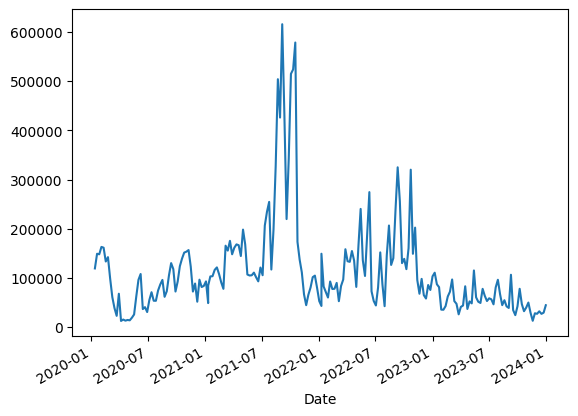

In [5]:
temp = df_w_2020_23['S1']
temp.plot()

In [29]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(df_w_2020_23[['S1']][:190])
scaled_train = scaler.transform(df_w_2020_23[['S1']][:190])
scaled_test = scaler.transform(df_w_2020_23[['S1']][190:])

In [6]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [36]:
WINDOW_SIZE = 10
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((200, 10, 1), (200,))

In [37]:
X_train1, y_train1 = X1[:180], y1[:180]
X_val1, y_val1 = X1[180:190], y1[180:190]
X_test1, y_test1 = X1[190:], y1[190:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((180, 10, 1), (180,), (10, 10, 1), (10,), (10, 10, 1), (10,))

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,425 (68.07 KB)

 Trainable params: 17,425 (68.07 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
cp1 = ModelCheckpoint('./model1/a.keras', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [40]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=50, callbacks=[cp1])

Epoch 1/50


6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - loss: 25056526336.0000 - root_mean_squared_error: 158304.6562 - val_loss: 2994490112.0000 - val_root_mean_squared_error: 54721.9336
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 26580264960.0000 - root_mean_squared_error: 162864.8438 - val_loss: 2994487552.0000 - val_root_mean_squared_error: 54721.9102
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 23574151168.0000 - root_mean_squared_error: 154101.7031 - val_loss: 2994484736.0000 - val_root_mean_squared_error: 54721.8867
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 24788463616.0000 - root_mean_squared_error: 157589.9219 - val_loss: 2994482176.0000 - val_root_mean_squared_error: 54721.8633
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 29313495040.0000 - root_mean_squared_error: 171161.0625 - val_loss: 2994479616.0000 - val_root_mean_squared_error: 54721.8398
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 23236167680.0000 - root_mean_squared_e

In [41]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/a.keras')

In [42]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


,Train Predictions,Actuals
0,2.876854,22263.02
1,2.876854,67341.79
2,2.876854,11881.08
3,2.876854,14745.91
4,2.876854,12499.00
...,...,...
175,2.876854,45764.83
176,2.876854,80263.65
177,2.876854,95778.07
178,2.876854,66450.44


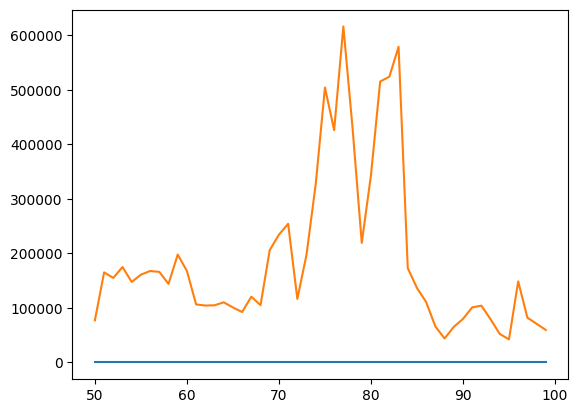

In [43]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])